In [96]:
import pandas as pd
import numpy as np

In [97]:
df=pd.read_csv('la_rest_types.csv', index_col=False)

In [99]:
# df.sample()
df.head(2)


,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
0,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Middle Eastern,4.0,349,34.159455,-118.267173,91202
1,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Barbeque,4.0,349,34.159455,-118.267173,91202


In [103]:
df.zipcodes.str.startswith('9')

0        True
1        True
2        True
3        True
4        True
         ... 
61420    True
61421    True
61422    True
61423    True
61424    True
Name: zipcodes, Length: 61425, dtype: bool

In [105]:
df=df[df.zipcodes.str.startswith('9')]

In [106]:
# df.isnull()

In [107]:
df['category_title'].replace(' ', np.nan, inplace=True)

In [108]:
# df.isnull()

In [109]:
df.dropna(inplace=True)

In [110]:
df.reset_index(drop=True)
df.sample()

,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
26255,I499t5nyk3WgSHFVSVhW2w,FishBar,"3801 Highland Ave Manhattan Beach, CA 90266",Breakfast & Brunch,4.0,1649,33.901701,-118.418306,90266


In [111]:
# df.isnull()

In [112]:
df['rating'].value_counts()

4.0    13291
4.5     7968
3.5     7900
3.0     4029
5.0     2504
2.5     2346
2.0     2010
1.5      832
1.0      268
Name: rating, dtype: int64

In [113]:
# df['category_title'].value_counts(normalize=True)
df['rating'].value_counts(bins=3)

(3.667, 5.0]      23763
(2.333, 3.667]    14275
(0.995, 2.333]     3110
Name: rating, dtype: int64

In [114]:
import matplotlib

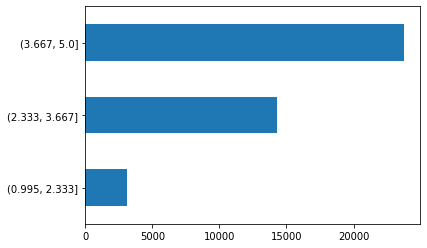

In [115]:
df.rating.value_counts(bins=3).sort_values().plot(kind = 'barh')

In [116]:
cat_desc=df['category_title'].describe()

#cat_desc.value_counts()

In [117]:
 %matplotlib inline

In [118]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [119]:
desc=df.describe()
desc

,rating,review_count,lat,lon
count,41148.000000,41148.000000,41148.000000,41148.000000
mean,3.710460,320.939122,33.979838,-118.256826
std,0.824635,541.021245,0.122265,0.173395
min,1.000000,1.000000,33.167953,-122.636364
25%,3.500000,40.000000,33.884035,-118.367151
50%,4.000000,141.000000,34.009925,-118.267295
75%,4.500000,384.000000,34.063720,-118.144367
max,5.000000,16955.000000,37.895588,-117.225868


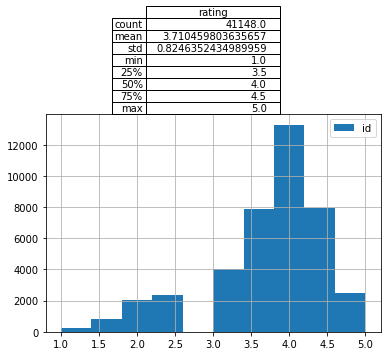

In [120]:
fig, axes = plt.subplots(1,1)
axes = df['rating'].hist()

plt.legend(df.columns)
dfsummary = pd.DataFrame(df['rating'].describe())

plt.table(cellText=dfsummary.values,
      colWidths = [0.4]*2,
      rowLabels=dfsummary.index,
      colLabels=dfsummary.columns,
      cellLoc = 'right', rowLoc = 'right',
      loc='top')

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x102839da10>,
      dtype=object)

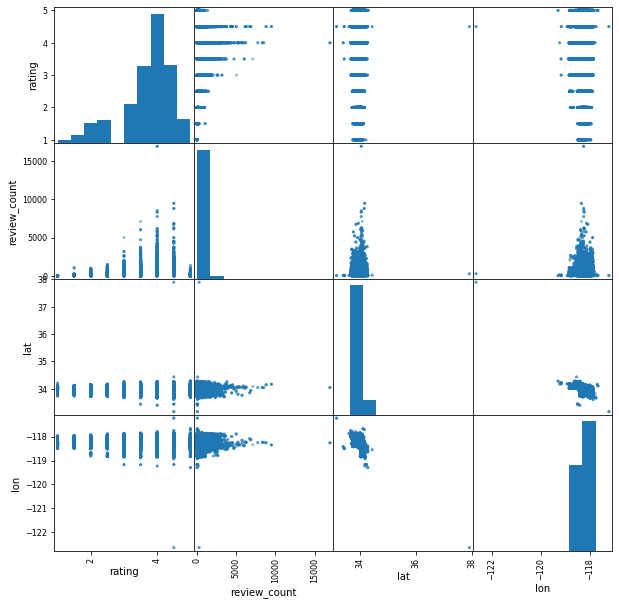

In [121]:
scatter_matrix(df, figsize=(10,10))

In [122]:
desc.groupby('rating')['review_count'].mean()

rating
0.824635          541.021245
1.000000            1.000000
3.500000           40.000000
3.710460          320.939122
4.000000          141.000000
4.500000          384.000000
5.000000        16955.000000
41148.000000    41148.000000
Name: review_count, dtype: float64

In [123]:
desc.groupby('rating')['review_count'].mean()

rating
0.824635          541.021245
1.000000            1.000000
3.500000           40.000000
3.710460          320.939122
4.000000          141.000000
4.500000          384.000000
5.000000        16955.000000
41148.000000    41148.000000
Name: review_count, dtype: float64

In [124]:
# df[df['rating']> 2.5].groupby('address')['rating']

zipcodes        90000.0
review_count        1.0
rating              1.0
dtype: float64

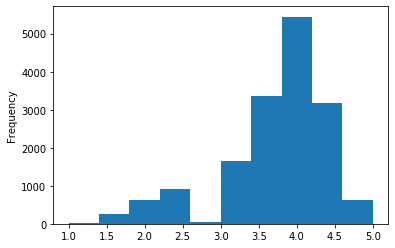

In [125]:
gr_zip = df.groupby(['zipcodes', 'review_count'])['rating'].median().reset_index()

gr_zip['rating'].plot(kind='hist')
gr_zip.min()


In [126]:
df.groupby('category_title').rating.apply(lambda x: len(x[x>2.5])/len(x) )

category_title
 Acai Bowls                0.975610
 African                   1.000000
 American (New)            0.964509
 American (Traditional)    0.860645
 Amusement Parks           0.500000
                             ...   
Waffles                    1.000000
Wine Bars                  1.000000
Wine Tasting Room          1.000000
Wineries                   1.000000
Wraps                      0.500000
Name: rating, Length: 499, dtype: float64

In [127]:
df.sample()

,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
57813,yGAcv-JFLXUQwi8HNA6aDQ,Taqueria El Atacor,"11156 1/2 Whittier Blvd Whittier, CA 90606",Mexican,3.5,87,33.986533,-118.059325,90606


In [128]:
means = df.groupby('zipcodes').mean()['rating']
means
# medians = clean_study_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
# variances = clean_study_data_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
# sds = clean_study_data_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
# sems = clean_study_data_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# summary_table = pd.DataFrame({"Mean Tumor Volume":means,
#                               "Median Tumor Volume":medians,
#                               "Tumor Volume Variance":variances,
#                               "Tumor Volume Std. Dev.":sds,
#                               "Tumor Volume Std. Err.":sems})

zipcodes
90000    4.000000
90001    3.626582
90002    3.352273
90003    3.304965
90004    3.852941
           ...   
94703    5.000000
94970    4.500000
95020    3.000000
95113    3.000000
96001    5.000000
Name: rating, Length: 346, dtype: float64

In [129]:
revCount = df.groupby('zipcodes').sum()['review_count']
revCount


zipcodes
90000     1753
90001     6070
90002     1904
90003     5562
90004    72633
         ...  
94703        1
94970      520
95020       36
95113     2766
96001       18
Name: review_count, Length: 346, dtype: int64

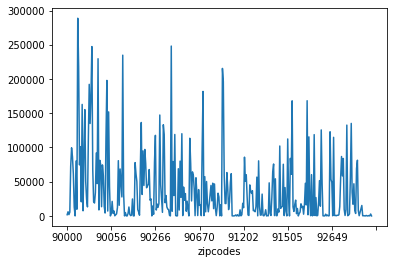

In [130]:
revCount.plot(kind='line')

In [131]:
%%bash
pip install seaborn

In [132]:
means = df.groupby('zipcodes').mean()['rating']
means

zipcodes
90000    4.000000
90001    3.626582
90002    3.352273
90003    3.304965
90004    3.852941
           ...   
94703    5.000000
94970    4.500000
95020    3.000000
95113    3.000000
96001    5.000000
Name: rating, Length: 346, dtype: float64

In [137]:
total_count = df.groupby('zipcodes').size()
total_count

zipcodes
90000      5
90001    237
90002     44
90003    141
90004    323
        ... 
94703      1
94970      2
95020      1
95113      3
96001      3
Length: 346, dtype: int64

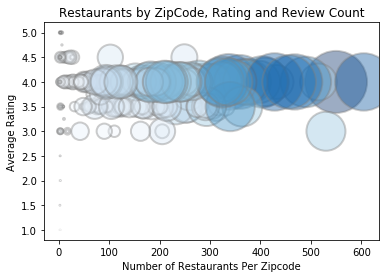

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
# create data
x = total_count
y = medians
z = revCount
# z=z*z
# z=z.sum()

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z/75, c=z, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("Number of Restaurants Per Zipcode")
plt.ylabel("Average Rating")
plt.title("Restaurants by ZipCode, Rating and Review Count")
 
plt.show()

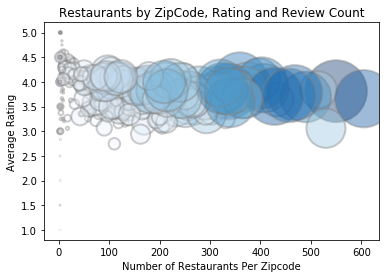

In [142]:
# create data
x = total_count
y = means
z = revCount
# z=z*z
# z=z.sum()

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z/75, c=z, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("Number of Restaurants Per Zipcode")
plt.ylabel("Average Rating")
plt.title("Restaurants by ZipCode, Rating and Review Count")
 
plt.show()

In [152]:
g = df.groupby('zipcodes')
rest_zips = [name for name,unused_df in g]
# rest_zips

In [153]:
# rest_zip = df['zipcodes'].unique()
# rest_zip

In [155]:
summary_table = pd.DataFrame({"Avg":means,
                              "Med":medians,
                              "RevCnt":revCount,
                              "ZipCnt":total_count,
                              "Zips":rest_zips})
summary_table

,Avg,Med,RevCnt,ZipCnt,Zips
zipcodes,,,,,
90000,4.000000,4.0,1753,5,90000
90001,3.626582,4.0,6070,237,90001
90002,3.352273,4.0,1904,44,90002
90003,3.304965,3.5,5562,141,90003
90004,3.852941,4.0,72633,323,90004
...,...,...,...,...,...
94703,5.000000,5.0,1,1,94703
94970,4.500000,4.5,520,2,94970
95020,3.000000,3.0,36,1,95020


In [156]:
summary_table["ZipCnt"]>=500


zipcodes
90000    False
90001    False
90002    False
90003    False
90004    False
         ...  
94703    False
94970    False
95020    False
95113    False
96001    False
Name: ZipCnt, Length: 346, dtype: bool

In [157]:
summary_table[summary_table["ZipCnt"]>=500]

,Avg,Med,RevCnt,ZipCnt,Zips
zipcodes,,,,,
90012,3.812727,4.0,288699,550,90012
90015,3.841748,4.0,101195,515,90015
90028,3.659504,4.0,247340,605,90028
90045,3.059434,3.0,114351,530,90045


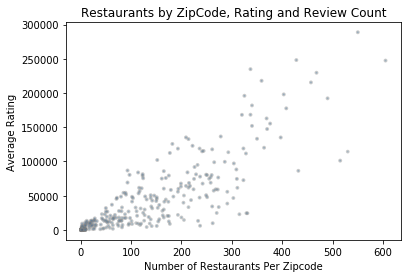

In [159]:
# create data
x = total_count
y = revCount
z = means
# z=z*z
# z=z.sum()

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z, c=z, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("Number of Restaurants Per Zipcode")
plt.ylabel("Average Rating")
plt.title("Restaurants by ZipCode, Rating and Review Count")
 
plt.show()

In [194]:
api_key = 'yourkeyhere'

In [195]:
import gmaps


# Access maps with unique API key
gmaps.configure(api_key=api_key)

In [196]:
# # Customize the size of the figure
# figure_layout = {
#     'width': '400px',
#     'height': '300px',
#     'border': '1px solid black',
#     'padding': '1px',
#     'margin': '0 auto 0 auto'
# }
# fig = gmaps.figure(layout=figure_layout)

In [171]:
#datframe for all types of food
aT=pd.read_csv('LA_rest_yelp_no_dupes.csv')
aT.sample()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon
9803,k0-syddVN1EqPM5dWbKbfw,Johnny's Shrimp Boat,1.626813e+10,"803 S Glendora Ave West Covina, CA 91790","seafood, fishnchips, hotdogs,","Seafood, Fish & Chips, Fast Food,",4.0,136,34.06144,-117.93253


In [172]:
zipcodes = list()

for item in aT['address']:
    zipcode = item.split()[-1]
    zipcodes.append(zipcode)

aT['zipcodes'] = zipcodes
aT = pd.DataFrame(aT)
aT.sample()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
10152,knJ9cXuYSztqNDEODGCk9Q,Cecconi's West Hollywood,1.310432e+10,"8764 Melrose Ave West Hollywood, CA 90069","italian,","Italian,",3.5,1422,34.080505,-118.385041,90069


In [175]:
list(aT[aT["zipcodes"]=='Kingdom']['address'])

['Suite 131  735 S Figueroa Street  Los Angeles 90017  United Kingdom',
 '243 Castle La West  Bournemouth BH8 9TG  United Kingdom',
 '181 Thornley La South  Stockport SK5 6QG  United Kingdom']

In [176]:
list(aT[aT["zipcodes"]=='CA']['address'])

['Cudahy St  Los Angeles, CA',
 'Los Angeles  Los Angeles, CA',
 'Carson, CA',
 'Torrance, CA',
 '102 Stonewood Mall  Downey, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Long Beach, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Hollywood  Holllywood, CA',
 '543 Hotel Cir S  San Pedro, CA',
 'Orange, CA',
 'Los Angeles, CA',
 'Downtown  Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Lakewood, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'hollywood  Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 '3RD St Normandie Ave NW  Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 '5311 Cotner Ave  Los Angeles, CA',
 'Long Beach, CA',
 'Norwalk, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 '12TH Between Main And Los Angeles  Santee Alley Area  Los Angeles, CA',
 

In [178]:
aT=aT[aT.zipcodes.str.startswith('9')]
aT.sample()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
17303,VWNrQxTv9yhRN1ScuJOneQ,Pick Up Stix,1.818752e+10,"3960 Laurel Canyon Blvd Studio City, CA 91604","chinese, asianfusion,","Chinese, Asian Fusion,",3.5,141,34.14254,-118.3944,91604


In [164]:
aT=aT[aT["review_count"]>=100]

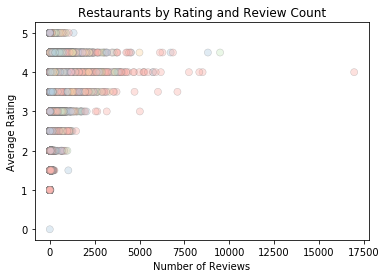

In [186]:
x = aT["review_count"]
y = aT["rating"]
z = aT.zipcodes.astype(int)
# z=z*z
# z=z.sum()

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=50, c=z, cmap="Pastel1", alpha=0.4, edgecolors="grey", linewidth=.5)
 
# Add titles (main and on axis)
plt.xlabel("Number of Reviews")
plt.ylabel("Average Rating")
plt.title("Restaurants by Rating and Review Count")
 
plt.show()

In [187]:
aT[aT["review_count"]>=15000]

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
15773,TkFEKhsCixPWlShULKvMdQ,Bottega Louie,1.213802e+10,"700 S Grand Ave Los Angeles, CA 90017","italian, bakeries, breakfast_brunch,","Italian, Bakeries, Breakfast & Brunch,",4.0,16955,34.04693,-118.256601,90017


In [189]:
aT[aT["zipcodes"]=='90017'].mean()

phone           1.229742e+10
rating          3.707602e+00
review_count    3.641170e+02
lat             3.405048e+01
lon            -1.182624e+02
zipcodes                 inf
dtype: float64

In [191]:
aT.describe()

,phone,rating,review_count,lat,lon
count,1.875800e+04,19980.000000,19980.000000,19980.000000,19980.000000
mean,1.449677e+10,3.694144,286.195295,33.978676,-118.253281
std,1.930745e+09,0.838203,497.982806,0.120067,0.169007
min,1.201844e+10,0.000000,0.000000,33.167953,-122.636364
25%,1.310559e+10,3.500000,31.000000,33.885953,-118.360725
50%,1.323735e+10,4.000000,119.000000,34.005714,-118.264616
75%,1.562937e+10,4.500000,341.250000,34.062453,-118.146361
max,1.951897e+10,5.000000,16955.000000,37.895588,-117.225868


In [241]:
badR=aT[(aT["review_count"]>=500) & (aT["rating"]== 1.5)]

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
8855,ILuXurLzw4N30I_RbPON2A,Buffalo Wild Wings,1.310437e+10,"736 East Del Amo Blvd Carson, CA 90746","chicken_wings, sportsbars, tradamerican,","Chicken Wings, Sports Bars, American (Traditio...",1.5,1032,33.847007,-118.262301,90746


In [252]:
bestR=aT[(aT["review_count"]>=300) & (aT["rating"]== 5)]

In [253]:
mapdf=aT[(aT["zipcodes"]=='90017') & (aT["rating"]>= 3.5)]


In [254]:
lat=list(mapdf['lat'])
lon=list(mapdf['lon'])

In [255]:
# coordinates = [
#     (40.71, -74.00),]

In [256]:
zip(lat, lon)

In [257]:
coordinates = [x for x in zip(lat, lon)]

In [258]:
# # Customize the size of the figure
# figure_layout = {
#     'width': '400px',
#     'height': '300px',
#     'border': '1px solid black',
#     'padding': '1px',
#     'margin': '0 auto 0 auto'
# }
# fig = gmaps.figure(layout=figure_layout)

In [260]:
# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
# Assign the marker layer to a variable
# markers = gmaps.marker_layer(coordinates)
heat_layer = gmaps.heatmap_layer(coordinates, weights=mapdf['rating']-3.5, 
                                 dissipating=False, max_intensity=1.5,
                                 point_radius = .0008)
# Add the layer to the map
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [ ]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=poverty_rate, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig